## Medical Cost Personal Dataset

### Context

The [dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance) is take from kaggle.com

### Data Overview


Columns in the data contains:

- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance

- We will explore a data set dedicated to the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. We have no data on the diagnosis of patients. But we have other information that can help us to make a conclusion about the health of patients and practice regression analysis. 

### Importing Dataset

In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('insurance.csv')

In [3]:
# overview of data columns
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# checking for null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- Great! There isn't any null value in data.

In [5]:
# Encoding category variables
from sklearn.preprocessing import LabelEncoder

#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)

# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)

#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

We must have a look at correlation of all the collumns with our target 'charges'.

In [6]:
# checking correlation of all columns with 'charges'
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<AxesSubplot:>

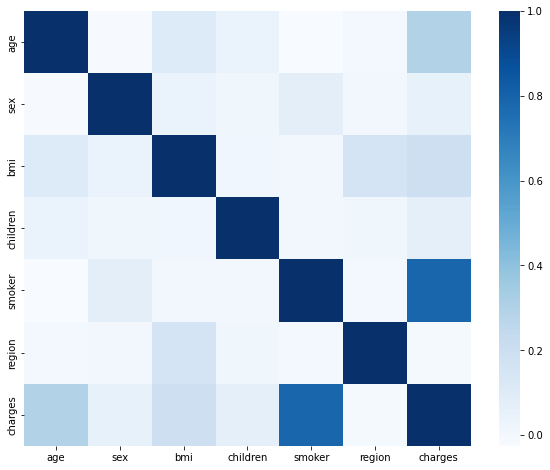

In [43]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="Blues")

- A strong correlation can be seen between smokers and the patients. Well, age is also correlated with the same but not strong enough.
Let's check if smokers is correlated with other variables 

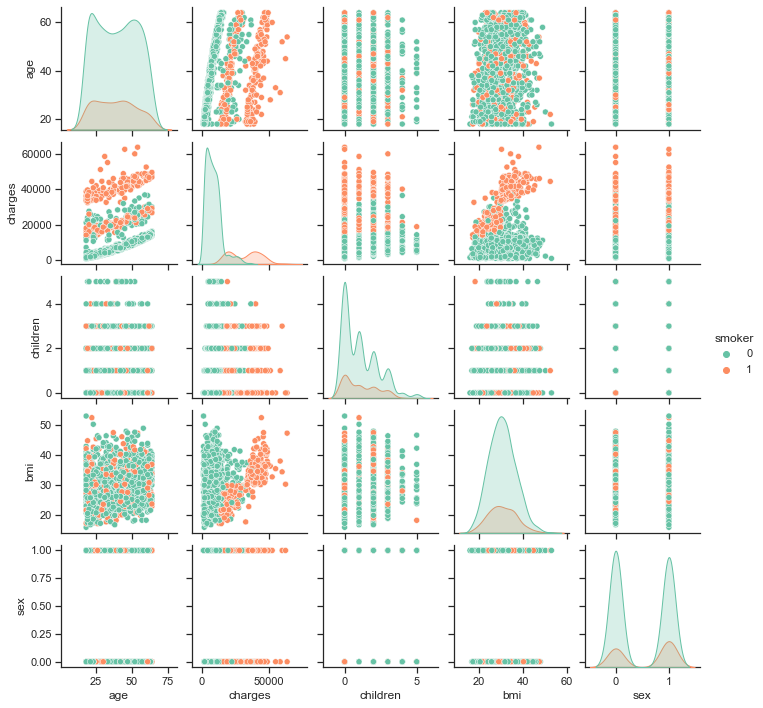

In [53]:
pair_cols = ["age", "charges", "children", "bmi", "smoker", "sex"] 
sns.pairplot(data[pair_cols], hue='smoker', palette="Set2", diag_kind="kde", size=2)

<AxesSubplot:xlabel='charges'>

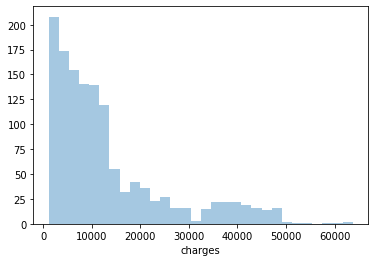

In [8]:
# Analysing 'charges'/target column
sns.distplot(data['charges'],kde = False)

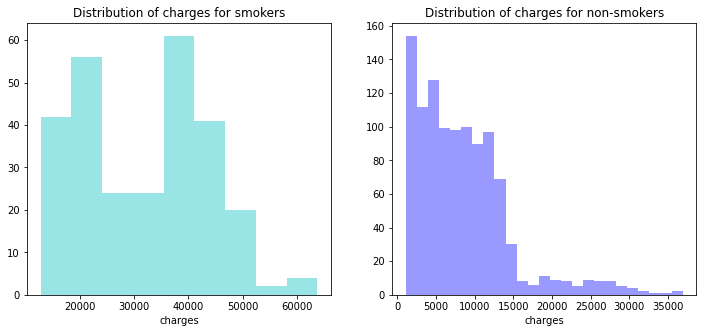

In [9]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],kde = False,color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')
ax.ticklabel_format(useOffset=False, style='plain')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],kde = False,color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')
ax.ticklabel_format(useOffset=False, style='plain')

- smokers spends more on treatment but number of non-smokers are more.

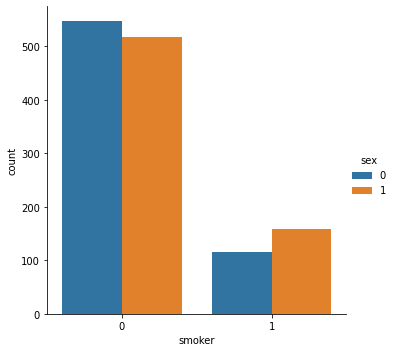

In [10]:
sns.catplot(x="smoker", kind="count",hue = 'sex', data=data)

Please note that women are coded with the symbol " 1 "and men - "0". 
We can notice that more male smokers than women smokers. It can be assumed that the total cost of treatment in men will be more than in women, given the impact of smoking. 

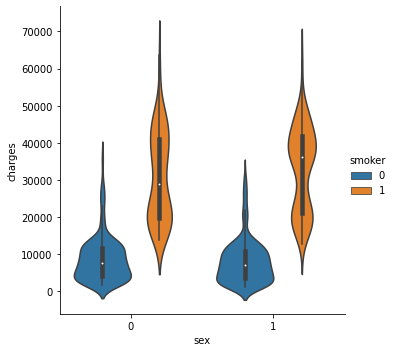

In [11]:
sns.catplot(x="sex", y="charges", hue="smoker", kind="violin", data=data)

Let's look at how age affects the cost of treatment, and also look at patients of what age more in our data set.

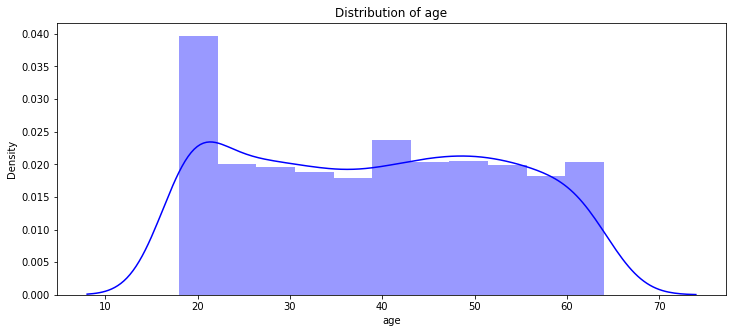

In [12]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'b')

- Distribution of age and charges for non-smokers

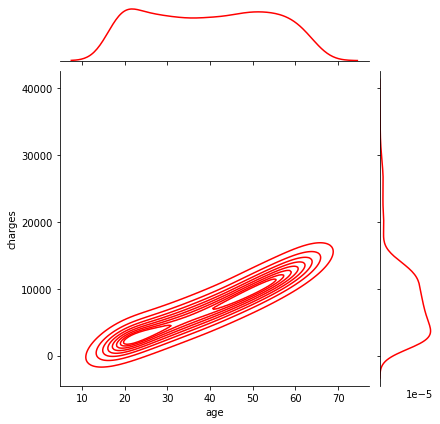

In [13]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 0)],kind="kde", color="r")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)

- And the same for smokers

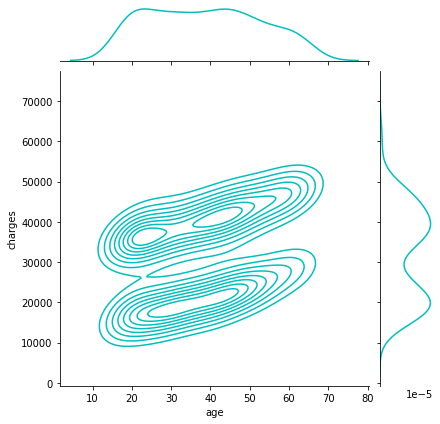

In [14]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 1)],kind="kde", color="c")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)

- In non-smokers, the cost of treatment increases with age. That makes sense. So take care of your health, friends! In smoking people, we do not see such dependence. I think that it is not only in smoking but also in the peculiarities of the dataset.
- Such a strong effect of Smoking on the cost of treatment would be more logical to judge having a set of data with a large number of records and signs. But we work with what we have! Let's pay attention to bmi. I am surprised that this figure but affects the cost of treatment in patients. Or are we on a diet for nothing?

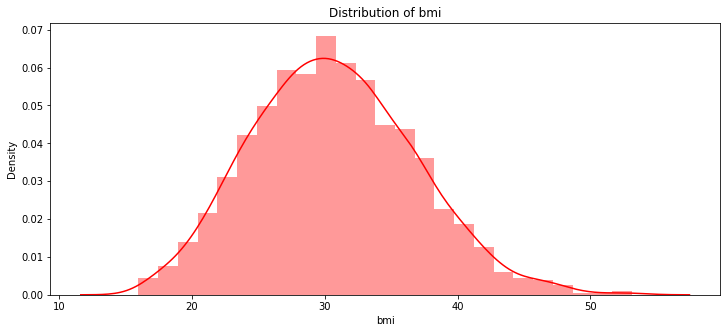

In [18]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'r')

- The average BMI in patients is 30. I think I should go to the great Google with a question about this indicator.
- With a value equal to 30 starts obesity. I also calculated my BMI and now I can safely eat a sandwich. Let's start to explore! First, let's look at the distribution of costs in patients with BMI greater than 30 and less than 30.

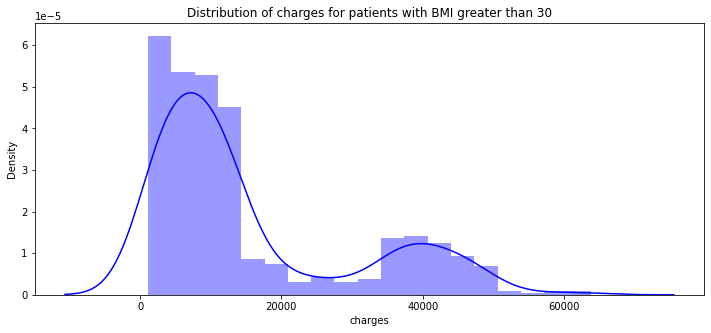

In [17]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'b')

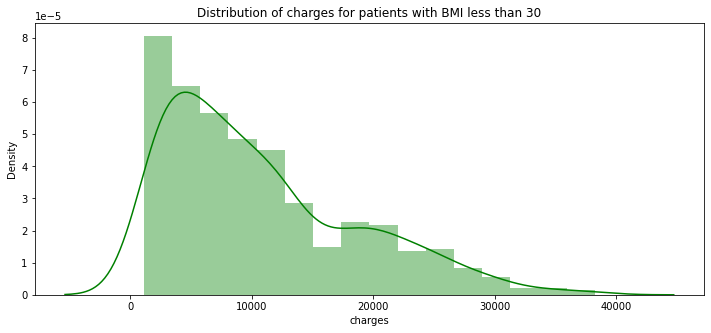

In [19]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'g')

- Patients with BMI above 30 spend more on treatment!

- Distribution of bmi and charges

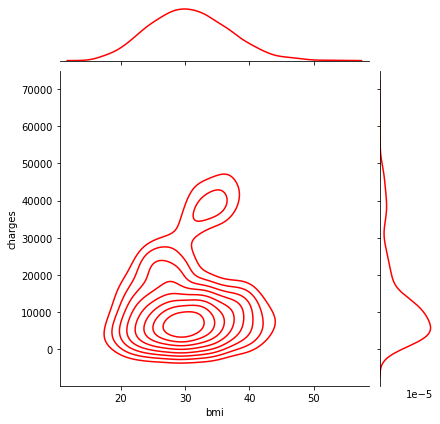

In [23]:
g = sns.jointplot(x="bmi", y="charges", data = data,kind="kde", color="r")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)

- Let's pay attention to children. First, let's see how many children our patients have.

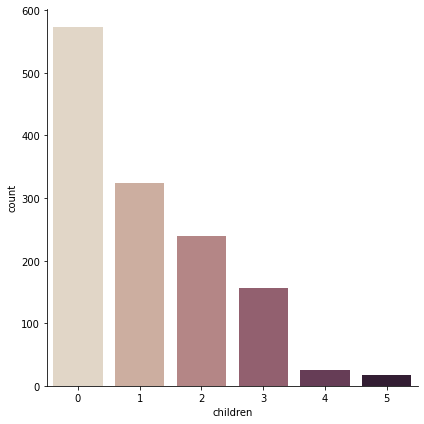

In [24]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, size = 6)

- Most patients do not have children. Perfectly, some have 5 children! I wonder if people who have children smoke.

Text(0.5, 1.0, 'Smokers and non-smokers who have childrens')

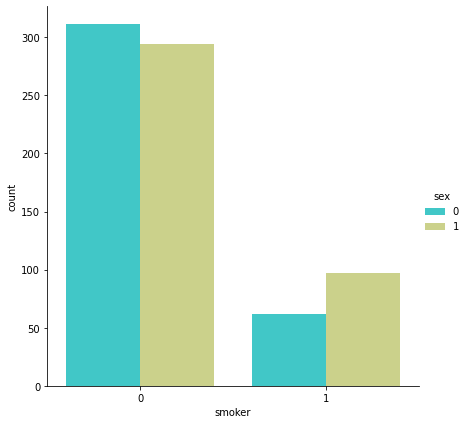

In [29]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex", data=data[(data.children > 0)], size = 6)
ax.set_title('Smokers and non-smokers who have childrens')

- It is obvious from the above pairplot the huge impact smoker category has on the insurance charges rates, compared to the other categories. 
- Also, smokers with children between 1 and 3, have higher insurance charges than non-smokers with the same number of children.
- Smoking doesn't seem to have an effect on the average bmi of the sample.
- Age does have an effect on raising the charges, but again it is when combined with smoking that the charges get substantially bigger.

- Now we are going to predict the cost of treatment. Let's start with the usual linear regression.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [32]:
x = data.drop(['charges'], axis = 1)
y = data.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7962732059725784


Not bad for such a lazy implementation. After all, the data will not always be so "good".
Now let's add polynomial signs. And look at the result.

In [33]:
X = data.drop(['charges','region'], axis = 1)
Y = data.charges

quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8849197344147238


 Well, we could limit ourselves to creating two or three polynomial features, but the data set is so small, so went the easy way. Let's try RandomForestRegressor.

In [34]:
rfr = RandomForestRegressor(n_estimators = 100, criterion = 'mse', random_state = 1, n_jobs = -1)
rfr.fit(x_train,y_train)
rfr_train_pred = rfr.predict(x_train)
rfr_test_pred = rfr.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
    mean_squared_error(y_train,rfr_train_pred),
    mean_squared_error(y_test,rfr_test_pred)))

print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,rfr_train_pred),
r2_score(y_test,rfr_test_pred)))

MSE train data: 3746684.434, MSE test data: 19965476.411
R2 train data: 0.974, R2 test data: 0.873


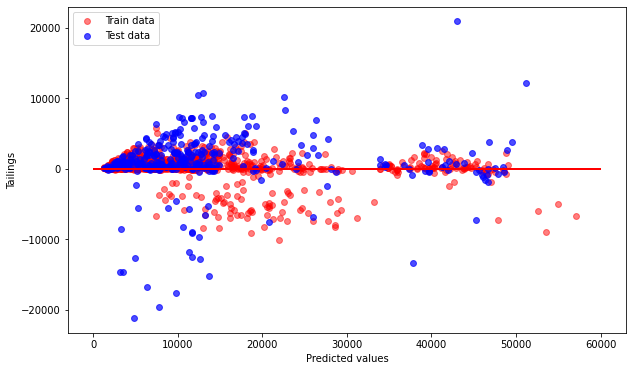

In [37]:
plt.figure(figsize=(10,6))

plt.scatter(rfr_train_pred,rfr_train_pred - y_train,
          c = 'r', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(rfr_test_pred,rfr_test_pred - y_test,
          c = 'b', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')

plt.xlabel('Predicted values')
plt.ylabel('Tailings')

plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

I have a few more ideas for exploring this dataset. I will soon implement them.
I'll add my own implementation of the linear regression algorithm. I hope to get a good result.